In [1]:
! pip install -q kaggle
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:11<00:00, 112MB/s]
100% 1.06G/1.06G [00:11<00:00, 98.7MB/s]


In [3]:
! mkdir data
! unzip dogs-vs-cats.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/train/dogs/dog.4419.jpg  
  inflating: data/train/dogs/dog.442.jpg  
  inflating: data/train/dogs/dog.4420.jpg  
  inflating: data/train/dogs/dog.4421.jpg  
  inflating: data/train/dogs/dog.4422.jpg  
  inflating: data/train/dogs/dog.4424.jpg  
  inflating: data/train/dogs/dog.4425.jpg  
  inflating: data/train/dogs/dog.4426.jpg  
  inflating: data/train/dogs/dog.4427.jpg  
  inflating: data/train/dogs/dog.4431.jpg  
  inflating: data/train/dogs/dog.4433.jpg  
  inflating: data/train/dogs/dog.4436.jpg  
  inflating: data/train/dogs/dog.4438.jpg  
  inflating: data/train/dogs/dog.4439.jpg  
  inflating: data/train/dogs/dog.444.jpg  
  inflating: data/train/dogs/dog.4440.jpg  
  inflating: data/train/dogs/dog.4441.jpg  
  inflating: data/train/dogs/dog.4442.jpg  
  inflating: data/train/dogs/dog.4443.jpg  
  inflating: data/train/dogs/dog.4444.jpg  
  inflating: data/train/dogs/dog.4445.jpg  
  inflating: data/train/dog

In [4]:
import warnings
warnings.filterwarnings('ignore')

import os
from os import makedirs # make directory
from os import listdir # list directories
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread # Used to read images
from PIL import Image # Image Visulization

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D

In [113]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [114]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 108ms/step - loss: 1.4159 - accuracy: 0.5458 - val_loss: 0.7280 - val_accuracy: 0.5154
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6522 - accuracy: 0.6283 - val_loss: 0.8349 - val_accuracy: 0.5880
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5979 - accuracy: 0.6901 - val_loss: 0.5811 - val_accuracy: 0.7022
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5359 - accuracy: 0.7400 - val_loss: 0.5148 - val_accuracy: 0.7526
Epoch 5/10
625/625 [==============================] - 68s 107ms/step - loss: 0.4896 - accuracy: 0.7704 - val_loss: 0.5501 - val_accuracy: 0.7204
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4452 - accuracy: 0.7982 - val_loss: 0.5264 - val_accuracy: 0.7456
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4028 - accuracy: 0.8195 - val_loss: 0.4699 - val_ac

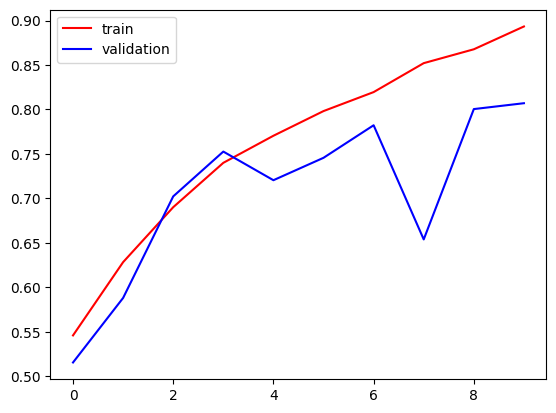

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

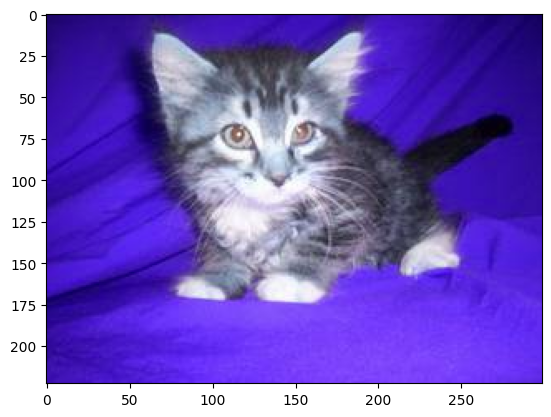

In [99]:
import cv2

test_img = cv2.imread('/content/data/dogs_vs_cats/test/cats/cat.10187.jpg')
plt.imshow(test_img)

In [100]:
test_img.shape

(223, 299, 3)

In [101]:
test_img = cv2.resize(test_img,(256,256))

In [102]:
test_input = test_img.reshape((1,256,256,3))

In [103]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)